In [1]:
#Build models using Keras
import keras
from keras import models
from keras import layers
from keras.layers.core import Permute
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.enable_eager_execution() 

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import tensorflow as tf
import timeit


with tf.device('/cpu:0'):
	cpu_a = tf.random.normal([10000, 1000])
	cpu_b = tf.random.normal([1000, 2000])
	print(cpu_a.device, cpu_b.device)

with tf.device('/gpu:0'):
	gpu_a = tf.random.normal([10000, 1000])
	gpu_b = tf.random.normal([1000, 2000])
	print(gpu_a.device, gpu_b.device)

def cpu_run():
	with tf.device('/cpu:0'):
		c = tf.matmul(cpu_a, cpu_b)
	return c

def gpu_run():
	with tf.device('/gpu:0'):
		c = tf.matmul(gpu_a, gpu_b)
	return c


# warm up
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:', cpu_time, gpu_time)


cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('run time:', cpu_time, gpu_time)


/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 1.3690448000000002 0.1982116000000005
run time: 1.3380089000000002 0.0006519999999996529


In [3]:
from PIL import Image
import glob
import cv2
import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [5]:
BASE_PATH = 'Data\\dogs-vs-cats\\train\\'
TRAIN_PATH='Data\\dogs-vs-cats\\train_data\\'
VAL_PATH='Data\\dogs-vs-cats\\validation_data\\'
batch_size = 5 
epochs = 30
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
import os

In [7]:
#import all the images in the file Left & Right
      
image_list = []
files = glob.glob (r"C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\*.png")

for filename in files:
    print(filename)
    image = cv2.imread(filename)
    #image = tf.image.resize(image, [125, 125])
    image_list.append(image) #convert images into array
    #print(filename)

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L10.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L11.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L12.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT101_L9.png
C

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT160_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT161_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT162_L1.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT213_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT214_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT214_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT214_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_R1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT215_R4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT217_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT217_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT219_L1.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT268_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT26_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT270_L1.png
C:\Users\Ad

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT329_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT331_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT334_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT334_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT337_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT337_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT337_L3.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT397_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT400_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT400_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT400_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT401_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT401_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT401_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT402_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT402_L2.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT449_R5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT450_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT450_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT451_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT451_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT452_L1.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT510_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT510_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_R1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_R2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_R3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_R4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT511_R5.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT542_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT543_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT544_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT544_L2.png
C:\U

C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT575_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT575_L7.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT575_L8.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT575_L9.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L2.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L3.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L4.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L5.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT576_L6.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L1.png
C:\Users\Administrator\Desktop\ICML Experiment 15th\V8\Left-V8-Normal\CT578_L2.png
C:\U

In [8]:
print('image_list shape:', np.array(image_list).shape)

image_list shape: (1224, 224, 224, 3)


In [9]:
#convert list into array
image_list = np.asarray(image_list)

In [10]:
image_list
print(type(image_list))

<class 'numpy.ndarray'>


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from PIL import Image

In [12]:
X = image_list.reshape(1224,3,224,224).transpose(0,2,3,1).astype("uint8") #48images with 125*125 pixels

In [13]:
X[0].max()

255

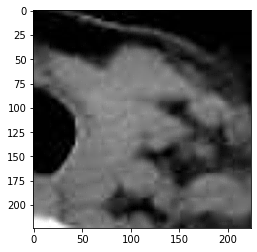

In [14]:
plt.imshow(image_list[410])

In [15]:
#Labels
df = pd.read_csv("Left-ChangedNormal.csv")

In [16]:
df

,Name,Size,Kind,Type,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,CT101_L1,125*125,Medullary,1,0,NaN,NaN,NaN,Normal,0.0,257.0,Normal,257.0
1,CT101_L10,125*125,Medullary,1,1,NaN,NaN,NaN,Nodule,1.0,371.0,Benign,627.0
2,CT101_L11,125*125,Medullary,1,2,NaN,NaN,NaN,Thyroiditis,2.0,108.0,NaN,NaN
3,CT101_L12,125*125,Medullary,1,3,NaN,NaN,NaN,Goiter,3.0,211.0,NaN,NaN
4,CT101_L2,125*125,Medullary,1,4,NaN,NaN,NaN,Adenoma,4.0,88.0,NaN,1180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,CT99_L2,125*125,Papillary,1,1219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1220,CT99_L3,125*125,Papillary,1,1220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,CT99_L6,125*125,Papillary,1,1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,CT99_L7,125*125,Papillary,1,1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1224 non-null   object 
 1   Size         1224 non-null   object 
 2   Kind         1224 non-null   object 
 3   Type         1224 non-null   int64  
 4   Unnamed: 4   1224 non-null   int64  
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   10 non-null     object 
 9   Unnamed: 9   8 non-null      float64
 10  Unnamed: 10  8 non-null      float64
 11  Unnamed: 11  3 non-null      object 
 12  Unnamed: 12  3 non-null      float64
dtypes: float64(6), int64(2), object(5)
memory usage: 124.4+ KB


In [18]:
#Extract type from df table
Label = df["Type"]

In [19]:
Label

0       1
1       1
2       1
3       1
4       1
       ..
1219    1
1220    1
1221    1
1222    1
1223    1
Name: Type, Length: 1224, dtype: int64

In [20]:
#Stack into array
label = np.asarray(Label)

In [21]:
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
def one_hot_encode(vec, vals = 2):
    #to one-hot encode the 4- possible labesl
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [23]:
class CifarHelper():
    def __init__(self):
        self.i = 0
        
        #self.all_train_batches = [X]
        
        self.images = None
        self.labels = None
        
    def set_up_images(self):
        print("Setting up images and labels")
        self.images = np.vstack([X])
        all_len = len(self.images)
        
        self.images = self.images.reshape(all_len, 3, 224, 224).transpose(0,2,3,1)/255
        self.labels = one_hot_encode(np.hstack([label]), 2)

In [24]:
#before tensorflow run:
ch = CifarHelper()
ch.set_up_images()

Setting up images and labels


0


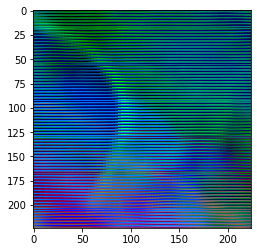

In [25]:
#Check the image and its label
index = 206
plt.imshow(X[index])
print(label[index])

In [26]:
#Encoding data

def vectorize_sequences(sequences, dimension = 1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [27]:
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [28]:
one_hot_labels = to_one_hot(label)

In [29]:
one_hot_labels[20]

array([1., 0.])

In [30]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

In [31]:
#Training & Testing Split using cross-validation
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

In [32]:
kf = StratifiedKFold(n_splits=10)

In [33]:
kf.get_n_splits(X, label)

10

In [34]:
y=label

In [35]:
for train_index, test_index in kf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [  80   81   82 ... 1221 1222 1223] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 147]
Train: [   0    1    2 ... 1221 1222 1223] Test: [ 80  81  82  83  84  85  86  87  88 112 113 114 115 116 117 137 138 139
 140 141 142 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 212 213 214 215 221 222 223
 224 225 226 227 228 229 230 231 232 

In [36]:
from tensorflow.keras import layers, Model, models, Sequential, regularizers

In [37]:
#Build models using Keras
import keras
from keras import models
from keras import layers
from keras.layers.core import Permute

In [38]:
# model_dense = tf,keras.applications.densenet.DenseNet121()

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model, Sequential, regularizers

cfgs = {
    'vgg8': [64,'M',128,'M',256,'M',512,'M',512,'M'],
    'vgg11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'vgg19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

def features(cfg):
    feature_layers = []
    for v in cfg:
        if v == "M":
            feature_layers.append(layers.MaxPool2D(pool_size=[2,2], strides=2, padding='same'))
        else:
            conv2d = layers.Conv2D(v, kernel_size=[3, 3], padding='same', activation=tf.nn.relu)
            feature_layers.append(conv2d)
    return Sequential(feature_layers, name="feature")

def VGG(feature, im_height=224, im_width=224, class_num=2):
    input_image = layers.Input(shape=(im_height, im_width, 3), dtype="float32")
    x = feature(input_image)
    x = layers.Flatten()(x)
    x = layers.Dropout(rate=0.5)(x)
#     x = layers.Dense(4096, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001))(x)
#     x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001))(x)
    output = layers.Dense(class_num, activation="relu")(x)
    model = models.Model(inputs=input_image, outputs=output)
    return model

def vgg(model_name="vgg8", im_height=224, im_width=224, class_num=2):
    try:
        cfg = cfgs[model_name]
    except:
        print("Warning: model number {} not in cfgs dict!".format(model_name))
        exit(-1)
    model = VGG(features(cfg), im_height=im_height, im_width=im_width, class_num=class_num)
    return model



In [40]:
def load_and_preprocess_from_path_label(image, label):
#     image = tf.image.decode_jpeg(image, channels=1)
#   image = tf.image.resize(image, [im_height, im_width])
    image = 2*tf.cast(image, dtype=tf.float32) / 255.-1
    label = tf.cast(label, dtype=tf.int32)

    return image, label

In [41]:
import time
from tensorflow.keras import optimizers

In [42]:
CV_summary = []
CM_summary_final = np.mat(np.zeros((2,2)))
t_CV = time.perf_counter()

fold = 0

for i in kf.split(X, y):
    fold += 1
    train_image = X[i[0]]
    train_label = one_hot_labels[i[0]]
    
    test_image = X[i[1]]
    test_label = one_hot_labels[i[1]]

    train_dataset = tf.data.Dataset.from_tensor_slices((train_image,train_label))
    train_db = train_dataset.shuffle(30).map(load_and_preprocess_from_path_label).batch(10)
    
    test_dataset = tf.data.Dataset.from_tensor_slices((test_image,test_label))
    test_db = test_dataset.shuffle(30).map(load_and_preprocess_from_path_label).batch(10)
    
    #print(train_db, test_db)
    
    #print(train_image[1])
    
    t_fold = time.perf_counter()

    model = vgg("vgg8")
    model.summary()
    
    optimizer = optimizers.Adam(lr=1e-5)
    
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

    
    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #CV_log_dir = 'logs/CV' + TOT + str(fold) + '%%' + current_time
    #CV_summary_writer = tf.summary.create_file_writer(CV_log_dir)

    CM_summary = np.mat(np.zeros((2,2)))
    Epoch_summary = []

    epochs = 35   #35

    for epoch in range(1,epochs+1):
        train_loss.reset_states()  # clear history info
        train_accuracy.reset_states()  # clear history info
        test_loss.reset_states()  # clear history info
        test_accuracy.reset_states()  # clear history info
        summary = []

        t1 = time.perf_counter()
        for step, (x,y) in enumerate(train_db):

            with tf.GradientTape() as tape:

                logits = model(x, training=True)
                # [b] => [b, 2]
                #y_onehot = tf.one_hot(y, depth=2)
                # compute loss
                loss = tf.losses.categorical_crossentropy(y, logits, from_logits=True)
#                 loss=tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = logits, dim=-1,name=None)
                loss = tf.reduce_mean(loss)
                train_loss(loss)
                train_accuracy(y, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))


    #     with CV_summary_writer.as_default():
    #         tf.summary.scalar('train-CrossEntropy', float(loss), step=epoch)
    #         tf.summary.scalar('train-Accuracy', float(train_accuracy.result() * 100), step=epoch)
        print('-----------------------------------------------------------------')
        print('Training time: ',time.perf_counter() - t1)

        test_pred = []
        test_GT = []
        
        t2 = time.perf_counter()
        for xt,yt in test_db:

            logits = model(xt, training=False)
            prob = tf.nn.softmax(logits, axis=1)
            pred = tf.argmax(prob, axis=1)
            pred = tf.cast(pred, dtype=tf.int32)

            new_label = tf.argmax(yt,axis=1)
            test_pred.extend(pred)
            test_GT.extend(new_label)
            #print(pred,label)
            #yt_onehot = tf.one_hot(yt, depth=2)
            t_loss = tf.losses.categorical_crossentropy(yt, logits, from_logits=True)
#             t_loss=tf.nn.softmax_cross_entropy_with_logits(labels = yt, logits = logits, dim=-1,name=None)

            test_loss(t_loss)
            test_accuracy(yt, logits)
 
        CM = tf.math.confusion_matrix(test_GT,test_pred)
        TP = CM[1,1]
        TN = CM[0,0]
        FP = CM[0,1]
        FN = CM[1,0]

        Acc = ((TP + TN) / (TP + TN + FP + FN))
        PPV = TP / (TP + FP)
        Sensitivity = TP / (TP + FN)
        Specificity = TN / (TN + FP)
        F1 = 2*(PPV*Sensitivity)/(PPV+Sensitivity)
        NPV = TN / (TN + FN)
        
#         CM = np.mat(np.array(tf.math.confusion_matrix(test_GT,test_pred,num_classes=2)))  
#         FP = CM.sum(axis=0)-np.diag(CM)
#         FN = CM.sum(axis=1)-np.diag(CM)
#         TP = np.diag(CM)
#         TN = CM.sum()-(FP+FN+TP)
        
#         FP = np.sum(FP.astype(float))
#         FN = np.sum(FN.astype(float))
#         TP = np.sum(TP.astype(float))
#         TN = np.sum(TN.astype(float))
        
        #Normal - 0
        
        
#         Acc = ((TP+TN) / (TP + TN + FP + FN))
#         Precision = TP / (TP + FP)
#         Re_call = TP / (TP + FN)
# #         TNR = TP / (TP + FN)

        if epoch > 25:    #25
            summary = [train_loss.result().numpy(),train_accuracy.result().numpy(), test_loss.result().numpy(),
                          Acc.numpy(), F1, Sensitivity, Specificity, PPV, NPV]
            Epoch_summary.append(summary)
                

        print('Test time: ', time.perf_counter() - t2)
        template1 = 'Fold {}, Epoch {}'
        template2 = 'Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
        print(template1.format(fold, epoch))
        print(template2.format(loss,
                            train_accuracy.result(),
                            test_loss.result(),
                            Acc))

        print(CM)
        print('Acc:', float(Acc),'F1:',float(F1), 'Sensitivity:',float(Sensitivity), 'Specificity:', float(Specificity),
              'PPV:',float(PPV), 'NPV:',float(NPV))
        print('-----------------------------------------------------------------')

        
    print('Fold time: ', time.perf_counter() - t_fold)
    print('Summary for fold: ',fold)
    print(Epoch_summary)
    epoch_mean = np.mean(Epoch_summary,axis=0)
    print('Mean:')
    print(epoch_mean)

    CV_summary.append(epoch_mean)
    
print('_________________________________________________________________')     
print('Cross validation summary: ')
print('Total time: ', time.perf_counter() - t_CV)
print(CV_summary)
print('Mean:')
print(np.mean(CV_summary,axis=0))


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         3910784   
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 5,516,610
Trainable params: 5,516,610
Non-trainable params: 0
___________________________________________________

-----------------------------------------------------------------
Training time:  21.572927899999968
Test time:  0.783235999999988
Fold 1, Epoch 15
Loss: 0.17631711065769196, Accuracy: 0.7892824411392212, Test Loss: 0.6433718204498291, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.482914300000004
Test time:  0.7827540999999769
Fold 1, Epoch 16
Loss: 0.16611763834953308, Accuracy: 0.7892824411392212, Test Loss: 0.6557210087776184, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-------------------------------------------------

-----------------------------------------------------------------
Training time:  21.499879299999975
Test time:  0.7858765000000858
Fold 1, Epoch 31
Loss: 0.08491549640893936, Accuracy: 0.8428701162338257, Test Loss: 0.6954518556594849, Test Accuracy: 0.7723577235772358
tf.Tensor(
[[ 4 22]
 [ 6 91]], shape=(2, 2), dtype=int32)
Acc: 0.7723577235772358 F1: 0.8666666666666667 Sensitivity: 0.9381443298969072 Specificity: 0.15384615384615385 PPV: 0.8053097345132744 NPV: 0.4
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.74961840000003
Test time:  0.7807413000000452
Fold 1, Epoch 32
Loss: 0.08872468024492264, Accuracy: 0.8592188954353333, Test Loss: 0.6873356699943542, Test Accuracy: 0.7723577235772358
tf.Tensor(
[[ 4 22]
 [ 6 91]], shape=(2, 2), dtype=int32)
Acc: 0.7723577235772358 F1: 0.8666666666666667 Sensitivity: 0.9381443298969072 Specificity: 0.15384615384615385 PPV: 0.8053097345132

Test time:  0.7965547999999671
Fold 2, Epoch 2
Loss: 0.2173880934715271, Accuracy: 0.7901907563209534, Test Loss: 0.4991312026977539, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.62494479999998
Test time:  0.7783538000001045
Fold 2, Epoch 3
Loss: 0.2150147706270218, Accuracy: 0.7901907563209534, Test Loss: 0.49968674778938293, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.37

-----------------------------------------------------------------
Training time:  21.42415189999997
Test time:  0.7823842000000241
Fold 2, Epoch 19
Loss: 0.11451592296361923, Accuracy: 0.8029064536094666, Test Loss: 0.481537789106369, Test Accuracy: 0.7967479674796748
tf.Tensor(
[[ 1 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7967479674796748 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.038461538461538464 PPV: 0.7950819672131147 NPV: 1.0
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.452317699999867
Test time:  0.7774249999999938
Fold 2, Epoch 20
Loss: 0.09127050638198853, Accuracy: 0.8074477910995483, Test Loss: 0.4982030689716339, Test Accuracy: 0.7967479674796748
tf.Tensor(
[[ 1 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7967479674796748 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.038461538461538464 PPV: 0.7950819672131147 NPV: 1.0
----------------

-----------------------------------------------------------------
Training time:  21.484782199999927
Test time:  0.7819071999999778
Fold 2, Epoch 35
Loss: 0.012683086097240448, Accuracy: 0.895549476146698, Test Loss: 0.5035303235054016, Test Accuracy: 0.7967479674796748
tf.Tensor(
[[ 4 22]
 [ 3 94]], shape=(2, 2), dtype=int32)
Acc: 0.7967479674796748 F1: 0.8826291079812206 Sensitivity: 0.9690721649484536 Specificity: 0.15384615384615385 PPV: 0.8103448275862069 NPV: 0.5714285714285714
-----------------------------------------------------------------
Fold time:  779.0310098
Summary for fold:  2
[[0.32825598, 0.85467756, 0.47976834, 0.7886178861788617, <tf.Tensor: shape=(), dtype=float64, numpy=0.8796296296296297>, <tf.Tensor: shape=(), dtype=float64, numpy=0.979381443298969>, <tf.Tensor: shape=(), dtype=float64, numpy=0.07692307692307693>, <tf.Tensor: shape=(), dtype=float64, numpy=0.7983193277310925>, <tf.Tensor: shape=(), dtype=float64, numpy=0.5>], [0.3216579, 0.8592189, 0.47229335, 0

-----------------------------------------------------------------
Training time:  21.37984520000009
Test time:  0.7706872999999632
Fold 3, Epoch 7
Loss: 0.15712495148181915, Accuracy: 0.7901907563209534, Test Loss: 0.5559923052787781, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.41277570000011
Test time:  0.7786014000000705
Fold 3, Epoch 8
Loss: 0.15922465920448303, Accuracy: 0.7901907563209534, Test Loss: 0.5652900338172913, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
----------------------------------------------------

Test time:  0.7705355000002783
Fold 3, Epoch 23
Loss: 0.025955410674214363, Accuracy: 0.8183469772338867, Test Loss: 0.6794595718383789, Test Accuracy: 0.7642276422764228
tf.Tensor(
[[ 0 26]
 [ 3 94]], shape=(2, 2), dtype=int32)
Acc: 0.7642276422764228 F1: 0.8663594470046082 Sensitivity: 0.9690721649484536 Specificity: 0.0 PPV: 0.7833333333333333 NPV: 0.0
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.45430269999997
Test time:  0.7836001000000579
Fold 3, Epoch 24
Loss: 0.011122017167508602, Accuracy: 0.8237965703010559, Test Loss: 0.7223594188690186, Test Accuracy: 0.7723577235772358
tf.Tensor(
[[ 0 26]
 [ 2 95]], shape=(2, 2), dtype=int32)
Acc: 0.7723577235772358 F1: 0.871559633027523 Sensitivity: 0.979381443298969 Specificity: 0.0 PPV: 0.7851239669421488 NPV: 0.0
-----------------------------------------------------------------
------------------------------------------------------

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         3910784   
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 5,516,610
Trainable params: 5,516,610
Non-trainable params: 0
_________________________________________________

-----------------------------------------------------------------
Training time:  21.25624499999958
Test time:  0.7804656000002979
Fold 4, Epoch 15
Loss: 0.23531286418437958, Accuracy: 0.7910990118980408, Test Loss: 0.5060201287269592, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.274219800000083
Test time:  0.7722943999997369
Fold 4, Epoch 16
Loss: 0.2538728415966034, Accuracy: 0.7920072674751282, Test Loss: 0.511569082736969, Test Accuracy: 0.7886178861788617
tf.Tensor(
[[ 0 26]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7886178861788617 F1: 0.8818181818181818 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7886178861788617 NPV: nan
---------------------------------------------------

-----------------------------------------------------------------
Training time:  21.338967700000012
Test time:  0.7717790000001514
Fold 4, Epoch 31
Loss: 0.08818913996219635, Accuracy: 0.8728428483009338, Test Loss: 0.502651035785675, Test Accuracy: 0.8211382113821138
tf.Tensor(
[[ 5 21]
 [ 1 96]], shape=(2, 2), dtype=int32)
Acc: 0.8211382113821138 F1: 0.897196261682243 Sensitivity: 0.9896907216494846 Specificity: 0.19230769230769232 PPV: 0.8205128205128205 NPV: 0.8333333333333334
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.32806299999993
Test time:  0.773392000000058
Fold 4, Epoch 32
Loss: 0.057638756930828094, Accuracy: 0.8792006969451904, Test Loss: 0.5267345309257507, Test Accuracy: 0.8211382113821138
tf.Tensor(
[[ 4 22]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.8211382113821138 F1: 0.8981481481481481 Sensitivity: 1.0 Specificity: 0.15384615384615385 PPV: 0.815126050420168

-----------------------------------------------------------------
Training time:  21.66128929999968
Test time:  0.7665402000002359
Fold 5, Epoch 3
Loss: 0.7756462097167969, Accuracy: 0.7894737124443054, Test Loss: 0.47708210349082947, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.580713099999684
Test time:  0.7689462999996977
Fold 5, Epoch 4
Loss: 0.8027888536453247, Accuracy: 0.7894737124443054, Test Loss: 0.4711158573627472, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 0 25]
 [ 0 97]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8858447488584476 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7950819672131147 NPV: nan
----------------------------------------------------

Test time:  0.7685977000001003
Fold 5, Epoch 19
Loss: 0.4578433632850647, Accuracy: 0.8103448152542114, Test Loss: 0.5402807593345642, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 25]
 [ 1 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541285 Sensitivity: 0.9896907216494846 Specificity: 0.0 PPV: 0.7933884297520661 NPV: 0.0
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.39100230000031
Test time:  0.7664761999999428
Fold 5, Epoch 20
Loss: 0.431191623210907, Accuracy: 0.8130671381950378, Test Loss: 0.5464354753494263, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 25]
 [ 1 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541285 Sensitivity: 0.9896907216494846 Specificity: 0.0 PPV: 0.7933884297520661 NPV: 0.0
-----------------------------------------------------------------
---------------------------------------------------------

-----------------------------------------------------------------
Training time:  21.415843199999927
Test time:  0.7669158000003335
Fold 5, Epoch 35
Loss: 0.38827764987945557, Accuracy: 0.8629764318466187, Test Loss: 0.6068763136863708, Test Accuracy: 0.7540983606557377
tf.Tensor(
[[ 0 25]
 [ 5 92]], shape=(2, 2), dtype=int32)
Acc: 0.7540983606557377 F1: 0.8598130841121494 Sensitivity: 0.9484536082474226 Specificity: 0.0 PPV: 0.7863247863247863 NPV: 0.0
-----------------------------------------------------------------
Fold time:  780.5762061999999
Summary for fold:  5
[[0.36372572, 0.8339383, 0.5813075, 0.7704918032786885, <tf.Tensor: shape=(), dtype=float64, numpy=0.8703703703703703>, <tf.Tensor: shape=(), dtype=float64, numpy=0.9690721649484536>, <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, <tf.Tensor: shape=(), dtype=float64, numpy=0.7899159663865546>, <tf.Tensor: shape=(), dtype=float64, numpy=0.0>], [0.3547043, 0.83030856, 0.5885218, 0.7622950819672131, <tf.Tensor: shape=(), d

-----------------------------------------------------------------
Training time:  21.155559999999696
Test time:  0.7694900000001326
Fold 6, Epoch 7
Loss: 0.6931471824645996, Accuracy: 0.21052631735801697, Test Loss: 0.6931471824645996, Test Accuracy: 0.20491803278688525
tf.Tensor(
[[25  0]
 [97  0]], shape=(2, 2), dtype=int32)
Acc: 0.20491803278688525 F1: nan Sensitivity: 0.0 Specificity: 1.0 PPV: nan NPV: 0.20491803278688525
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.15848589999996
Test time:  0.7640062000000398
Fold 6, Epoch 8
Loss: 0.6931471824645996, Accuracy: 0.21052631735801697, Test Loss: 0.6931471824645996, Test Accuracy: 0.20491803278688525
tf.Tensor(
[[25  0]
 [97  0]], shape=(2, 2), dtype=int32)
Acc: 0.20491803278688525 F1: nan Sensitivity: 0.0 Specificity: 1.0 PPV: nan NPV: 0.20491803278688525
-----------------------------------------------------------------
---------

-----------------------------------------------------------------
Training time:  21.14571950000027
Test time:  0.7630245000000286
Fold 6, Epoch 24
Loss: 0.6931471824645996, Accuracy: 0.21052631735801697, Test Loss: 0.6931471824645996, Test Accuracy: 0.20491803278688525
tf.Tensor(
[[25  0]
 [97  0]], shape=(2, 2), dtype=int32)
Acc: 0.20491803278688525 F1: nan Sensitivity: 0.0 Specificity: 1.0 PPV: nan NPV: 0.20491803278688525
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.149018300000535
Test time:  0.7688066000000617
Fold 6, Epoch 25
Loss: 0.6931471824645996, Accuracy: 0.21052631735801697, Test Loss: 0.6931471824645996, Test Accuracy: 0.20491803278688525
tf.Tensor(
[[25  0]
 [97  0]], shape=(2, 2), dtype=int32)
Acc: 0.20491803278688525 F1: nan Sensitivity: 0.0 Specificity: 1.0 PPV: nan NPV: 0.20491803278688525
-----------------------------------------------------------------
-------

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         3910784   
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 130       
Total params: 5,516,610
Trainable params: 5,516,610
Non-trainable params: 0
_________________________________________________

-----------------------------------------------------------------
Training time:  21.25302079999983
Test time:  0.7676113999996232
Fold 7, Epoch 15
Loss: 0.12784022092819214, Accuracy: 0.7976406812667847, Test Loss: 0.5155659317970276, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 25]
 [ 1 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541285 Sensitivity: 0.9896907216494846 Specificity: 0.0 PPV: 0.7933884297520661 NPV: 0.0
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.25567450000017
Test time:  0.7669173000003866
Fold 7, Epoch 16
Loss: 0.08770470321178436, Accuracy: 0.803992748260498, Test Loss: 0.5189046263694763, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 25]
 [ 1 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541285 Sensitivity: 0.9896907216494846 Specificity: 0.0 PPV: 0.7933884297520661 NPV: 0.0
---------------------

-----------------------------------------------------------------
Training time:  21.324953899999855
Test time:  0.7714045999991868
Fold 7, Epoch 31
Loss: 0.021270623430609703, Accuracy: 0.8566243052482605, Test Loss: 0.5578285455703735, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 1 24]
 [ 2 95]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8796296296296297 Sensitivity: 0.979381443298969 Specificity: 0.04 PPV: 0.7983193277310925 NPV: 0.3333333333333333
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.321009300000696
Test time:  0.7715428000001339
Fold 7, Epoch 32
Loss: 0.030805375427007675, Accuracy: 0.8575317859649658, Test Loss: 0.562756359577179, Test Accuracy: 0.7786885245901639
tf.Tensor(
[[ 1 24]
 [ 3 94]], shape=(2, 2), dtype=int32)
Acc: 0.7786885245901639 F1: 0.8744186046511628 Sensitivity: 0.9690721649484536 Specificity: 0.04 PPV: 0.7966101694915254 NPV: 0.25


-----------------------------------------------------------------
Training time:  21.31957700000021
Test time:  0.76952429999983
Fold 8, Epoch 3
Loss: 0.22582867741584778, Accuracy: 0.790381133556366, Test Loss: 0.5161002278327942, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.34225779999997
Test time:  0.7702597999996215
Fold 8, Epoch 4
Loss: 0.2283141016960144, Accuracy: 0.790381133556366, Test Loss: 0.5118340253829956, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
---------------------------------------------------------

Test time:  0.7684674000001905
Fold 8, Epoch 19
Loss: 0.027645818889141083, Accuracy: 0.803992748260498, Test Loss: 0.44414985179901123, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.429284099999677
Test time:  0.7697358999994321
Fold 8, Epoch 20
Loss: 0.026170862838625908, Accuracy: 0.8121597170829773, Test Loss: 0.44334086775779724, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:

-----------------------------------------------------------------
Training time:  21.462314599999445
Test time:  0.7698533000002499
Fold 8, Epoch 35
Loss: 0.0013597665820270777, Accuracy: 0.8983666300773621, Test Loss: 0.5135989785194397, Test Accuracy: 0.8278688524590164
tf.Tensor(
[[ 5 21]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.8278688524590164 F1: 0.9014084507042254 Sensitivity: 1.0 Specificity: 0.19230769230769232 PPV: 0.8205128205128205 NPV: 1.0
-----------------------------------------------------------------
Fold time:  776.1774034
Summary for fold:  8
[[0.3358868, 0.8566243, 0.45750064, 0.7950819672131147, <tf.Tensor: shape=(), dtype=float64, numpy=0.8847926267281107>, <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, <tf.Tensor: shape=(), dtype=float64, numpy=0.038461538461538464>, <tf.Tensor: shape=(), dtype=float64, numpy=0.7933884297520661>, <tf.Tensor: shape=(), dtype=float64, numpy=1.0>], [0.3266832, 0.86569875, 0.4647465, 0.7950819672131147, <tf.Tensor: shape=(), dt

-----------------------------------------------------------------
Training time:  21.327049500000612
Test time:  0.7730295999999726
Fold 9, Epoch 7
Loss: 0.29379934072494507, Accuracy: 0.790381133556366, Test Loss: 0.48636582493782043, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.318413199999668
Test time:  0.7698004000003493
Fold 9, Epoch 8
Loss: 0.2638172209262848, Accuracy: 0.790381133556366, Test Loss: 0.4804707467556, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 0 26]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8807339449541284 Sensitivity: 1.0 Specificity: 0.0 PPV: 0.7868852459016393 NPV: nan
-------------------------------------------------------

-----------------------------------------------------------------
Training time:  21.421808999999485
Test time:  0.7738653999995222
Fold 9, Epoch 23
Loss: 0.036434371024370193, Accuracy: 0.8557168841362, Test Loss: 0.5088743567466736, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 2 24]
 [ 2 94]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8785046728971962 Sensitivity: 0.9791666666666666 Specificity: 0.07692307692307693 PPV: 0.7966101694915254 NPV: 0.5
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.41363089999959
Test time:  0.7702705000001515
Fold 9, Epoch 24
Loss: 0.03888225555419922, Accuracy: 0.8638838529586792, Test Loss: 0.5140358209609985, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 2 24]
 [ 2 94]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8785046728971962 Sensitivity: 0.9791666666666666 Specificity: 0.07692307692307693 PPV: 0.796610169491525

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         3910784   
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 130       
Total params: 5,516,610
Trainable params: 5,516,610
Non-trainable params: 0
_________________________________________________

-----------------------------------------------------------------
Training time:  21.50263140000061
Test time:  0.7703780000001643
Fold 10, Epoch 15
Loss: 0.1545630395412445, Accuracy: 0.8003630042076111, Test Loss: 0.5232670903205872, Test Accuracy: 0.7786885245901639
tf.Tensor(
[[ 0 26]
 [ 1 95]], shape=(2, 2), dtype=int32)
Acc: 0.7786885245901639 F1: 0.8755760368663597 Sensitivity: 0.9895833333333334 Specificity: 0.0 PPV: 0.7851239669421488 NPV: 0.0
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.595527299999958
Test time:  0.7708476999996492
Fold 10, Epoch 16
Loss: 0.15718093514442444, Accuracy: 0.803992748260498, Test Loss: 0.5189403891563416, Test Accuracy: 0.7950819672131147
tf.Tensor(
[[ 1 25]
 [ 0 96]], shape=(2, 2), dtype=int32)
Acc: 0.7950819672131147 F1: 0.8847926267281107 Sensitivity: 1.0 Specificity: 0.038461538461538464 PPV: 0.7933884297520661 NPV: 1.0
-----------------

-----------------------------------------------------------------
Training time:  21.5518505
Test time:  0.7740873000002466
Fold 10, Epoch 31
Loss: 0.056446388363838196, Accuracy: 0.8765880465507507, Test Loss: 0.5068970918655396, Test Accuracy: 0.8032786885245902
tf.Tensor(
[[ 7 19]
 [ 5 91]], shape=(2, 2), dtype=int32)
Acc: 0.8032786885245902 F1: 0.883495145631068 Sensitivity: 0.9479166666666666 Specificity: 0.2692307692307692 PPV: 0.8272727272727273 NPV: 0.5833333333333334
-----------------------------------------------------------------
-----------------------------------------------------------------
Training time:  21.535665399999743
Test time:  0.7713396000008288
Fold 10, Epoch 32
Loss: 0.03649288788437843, Accuracy: 0.88475501537323, Test Loss: 0.5077856183052063, Test Accuracy: 0.7868852459016393
tf.Tensor(
[[ 3 23]
 [ 3 93]], shape=(2, 2), dtype=int32)
Acc: 0.7868852459016393 F1: 0.8773584905660377 Sensitivity: 0.96875 Specificity: 0.11538461538461539 PPV: 0.8017241379310345 

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
from keras.utils import to_categorical

In [44]:
auc_score=roc_auc_score(test_GT,test_pred)

In [45]:
auc_score

0.5176282051282051

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [47]:
multilabel_confusion_matrix(test_GT,test_pred)

array([[[92,  4],
        [24,  2]],

       [[ 2, 24],
        [ 4, 92]]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(test_GT,test_pred))

              precision    recall  f1-score   support

           0       0.33      0.08      0.12        26
           1       0.79      0.96      0.87        96

    accuracy                           0.77       122
   macro avg       0.56      0.52      0.50       122
weighted avg       0.70      0.77      0.71       122

